<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2_0_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Load Data

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, delim_whitespace=True, names=col_names)


In [86]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [88]:
X = df.drop(columns=['MEDV'])

y = df['MEDV']

In [89]:
# Define a function to calculate the lower and upper bounds for outliers
def outlier_bounds(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply the function to each column in your dataframe
for col in X.columns:
    lower_bound, upper_bound = outlier_bounds(X[col])
    X[col] = np.where(X[col] > upper_bound, upper_bound, np.where(X[col] < lower_bound, lower_bound, X[col]))

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
print(X.shape, y.shape)

(506, 13) (506,)


## Part 2: Initialize Model

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [94]:
def initialize_model():
  # architecture
  model = Sequential()
  model.add(Dense(8, activation='relu', input_shape=(13,)))
  model.add(Dense(1, activation='linear'))

  # compile
  model.compile(loss='mse',
                optimizer=SGD(0.001, 0.9))
  return model

In [95]:
# learning rate scheduler
def scheduler(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [96]:
# train the model
model = initialize_model()

history = model.fit(X_train, y_train,
                    epochs=50,
                    # callbacks=[lr_scheduler],
                    verbose=0)

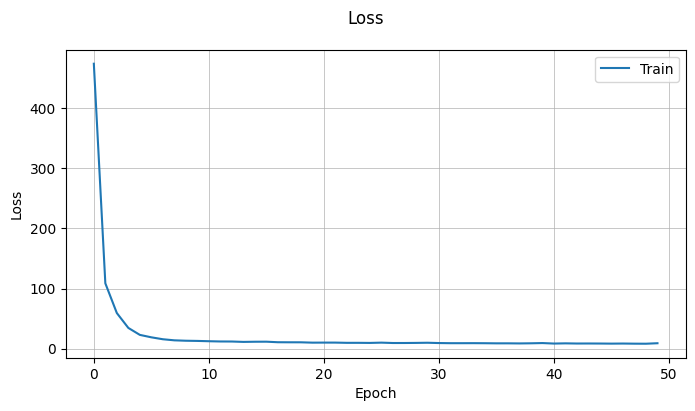

In [69]:
def plot_loss(history, title=None):
    fig, ax = plt.subplots(figsize=(8,4))

    # --- LOSS ---

    ax.plot(history.history['loss'])

    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')

    ax.legend(['Train', 'Test'], loc='best')

    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss(history, title='Loss')

In [97]:
# Get the weights
print(model.layers)
print(model.layers[0].get_weights())

[<keras.layers.core.dense.Dense object at 0x7c702259b280>, <keras.layers.core.dense.Dense object at 0x7c702259a830>]
[array([[-0.63145226, -0.1596683 , -1.4832906 , -0.2927837 , -0.981831  ,
         0.06741488,  0.10815793,  0.43232036],
       [-0.4544799 ,  0.1810354 ,  0.02099061, -0.31294706, -0.3404912 ,
        -0.34908438, -0.18539602,  0.2209401 ],
       [ 0.5372693 , -0.31548482, -0.32466653,  0.57856894, -0.4682541 ,
        -0.2319002 ,  0.14102966,  0.761169  ],
       [ 0.49411362, -0.4753347 , -0.524667  ,  0.02680814,  0.4581238 ,
        -0.10310426, -0.43599534, -0.4708649 ],
       [-0.24440326, -0.30944118, -0.44297752, -0.01038523,  0.22227444,
        -1.2534637 , -1.3038962 , -0.35243127],
       [-1.0600704 ,  1.9599115 ,  1.903801  , -0.1788458 , -0.93918866,
        -0.73542446,  1.2743027 ,  0.93742055],
       [ 0.21457484, -0.49692112, -0.8773291 ,  0.75085175, -0.14522724,
         0.47236046,  0.00600798, -0.1689522 ],
       [-1.1560671 , -0.98135495, -

The `model.layers[0].get_weights()` command is used to retrieve the weights (i.e., the parameters) of the first layer of the model. In a Dense layer, this will return a list of two elements:

1.   A 2D weight matrix, where each row corresponds to one of the input dimensions and each column corresponds to one of the units (neurons) in the layer. Since we only have 1 neuron in your Dense layer, it will return a matrix with 13 rows and 1 column. These are often called the "synaptic" weights.

2.   A 1D bias vector, with as many elements as there are units (neurons) in the layer. Since we only have 1 neuron, it will return a vector with a single element. The bias is like an intercept term in a linear model; it's added to the weighted inputs before the activation function is applied.



## Part 3: Prediction

In [98]:
pred = model.predict(X_test)
pred[:10]

6/6 [==============================] - 0s 2ms/step


array([[15.308031],
       [27.198977],
       [17.895966],
       [38.332047],
       [42.137474],
       [17.53306 ],
       [22.07843 ],
       [20.451344],
       [22.207954],
       [42.42491 ]], dtype=float32)

In [99]:
pred_f = pred.flatten()
pred_f[:5]

array([15.308031, 27.198977, 17.895966, 38.332047, 42.137474],
      dtype=float32)

In [100]:
# Evaluation
results_train = model.evaluate(X_train, y_train, verbose=0)
results_test = model.evaluate(X_test, y_test, verbose=0)

In [101]:
print("Training MSE:", results_train)
print("Test MSE:", results_test)

print("\nTraining RMSE:", np.sqrt(results_train))
print("Test RMSE:", np.sqrt(results_test))

Training MSE: 8.95952033996582
Test MSE: 14.114298820495605

Training RMSE: 2.9932457867615585
Test RMSE: 3.756900161102981


If the model's predictions are unbiased, the residuals should be centered around zero and should follow a normal distribution.

6/6 [==============================] - 0s 2ms/step


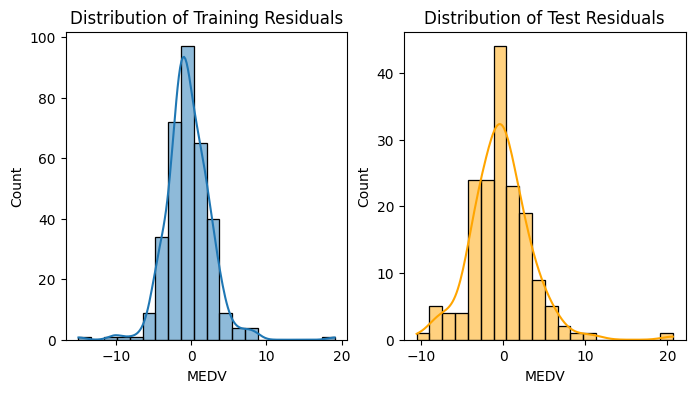

In [102]:
# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute residuals
residuals_train = y_train - y_train_pred.flatten()
residuals_test = y_test - y_test_pred.flatten()

# Plot distribution of residuals
plt.figure(figsize=(8, 4))

plt.subplot(121)
sns.histplot(residuals_train, bins=20, kde=True)
plt.title('Distribution of Training Residuals')

plt.subplot(122)
sns.histplot(residuals_test, bins=20, kde=True, color='orange')
plt.title('Distribution of Test Residuals')

plt.show()


If the model's predictions are perfect, all points would lie on the 45-degree line. Deviations from this line indicate prediction errors.

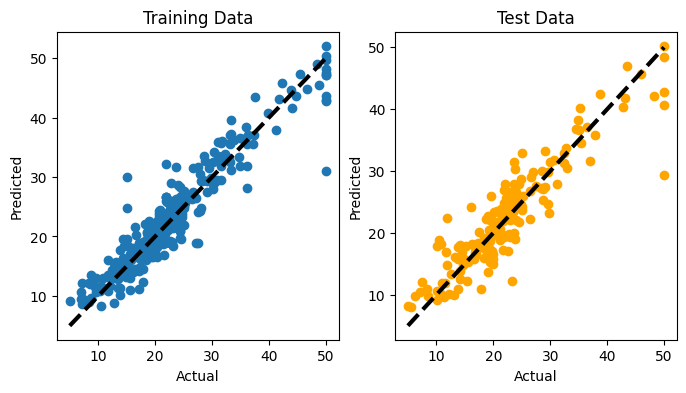

In [103]:
# Scatterplot of predicted vs. actual values
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

plt.subplot(122)
plt.scatter(y_test, y_test_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')

plt.show()


In [104]:
from scipy import stats

# Test normality of residuals
_, p_value_train = stats.shapiro(residuals_train)
_, p_value_test = stats.shapiro(residuals_test)

print("Training residuals normality test p-value:", round(p_value_train, 4))
print("Test residuals normality test p-value:", round(p_value_test, 4))


Training residuals normality test p-value: 0.0
Test residuals normality test p-value: 0.0


In this case, a low p-value (typically below 0.05) indicates that the null hypothesis can be rejected, i.e., the residuals are not normally distributed.